In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming your data is in a CSV file
df = pd.read_csv('/content/drive/MyDrive/cleaned_data/processed_pubmed_data_with_entities.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585349 entries, 0 to 585348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   article_id          585349 non-null  int64 
 1   Date                585349 non-null  object
 2   Title               585349 non-null  object
 3   Abstract            585349 non-null  object
 4   MeshHeading         392580 non-null  object
 5   Keywords            434874 non-null  object
 6   Year                585349 non-null  int64 
 7   processed_Title     585349 non-null  object
 8   processed_Abstract  585349 non-null  object
 9   title_entities      585349 non-null  object
 10  abstract_entities   585349 non-null  object
dtypes: int64(2), object(9)
memory usage: 49.1+ MB


# Exploratory Data Analysis of 'Titie', 'Abstract', 'Keyword' and 'MeshHeading' Fields

## Analyses the Distribution of Title and Abstract Lengths.

article_id                 0
Date                       0
Title                      0
Abstract                   0
MeshHeading           192769
Keywords              150475
Year                       0
processed_Title            0
processed_Abstract         0
title_entities             0
abstract_entities          0
dtype: int64


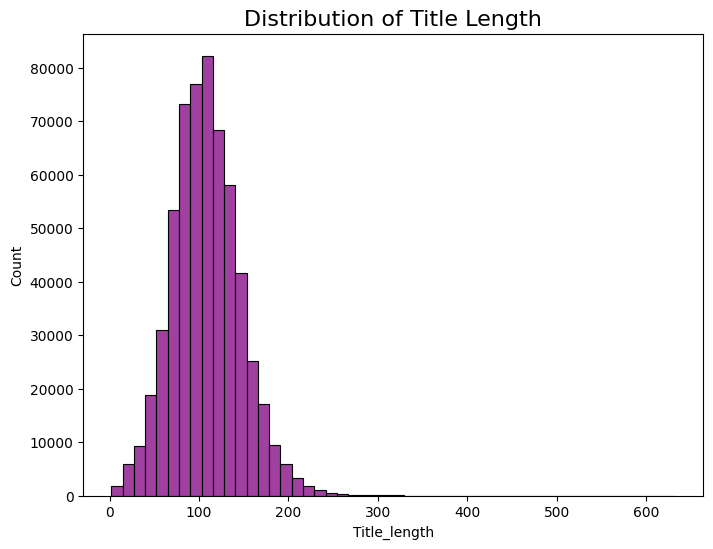

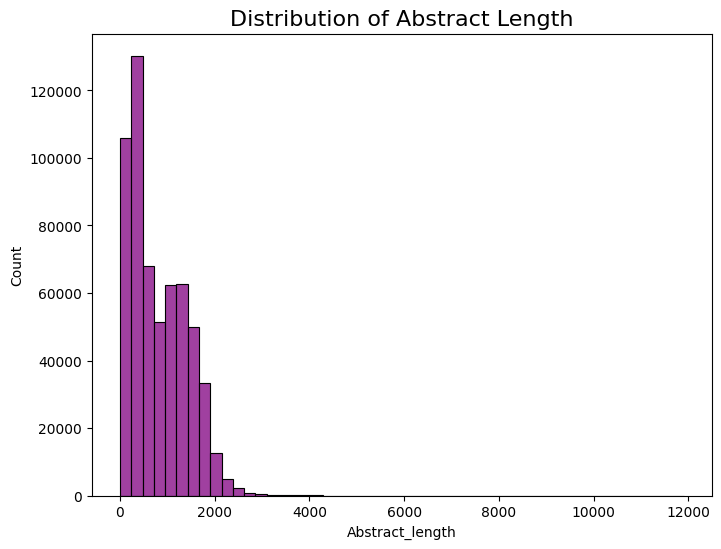

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Missing value checks
print(df.isnull().sum())

# Distribution of text length
df['Title_length'] = df['Title'].str.len()
df['Abstract_length'] = df['Abstract'].str.len()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Title_length', bins=50, color='purple')
plt.title('Distribution of Title Length', fontsize = 16)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Abstract_length', bins=50, color='purple')
plt.title('Distribution of Abstract Length', fontsize = 16)
plt.show()

## Word Clouds for Titles, Keywords, and MeshHeadings

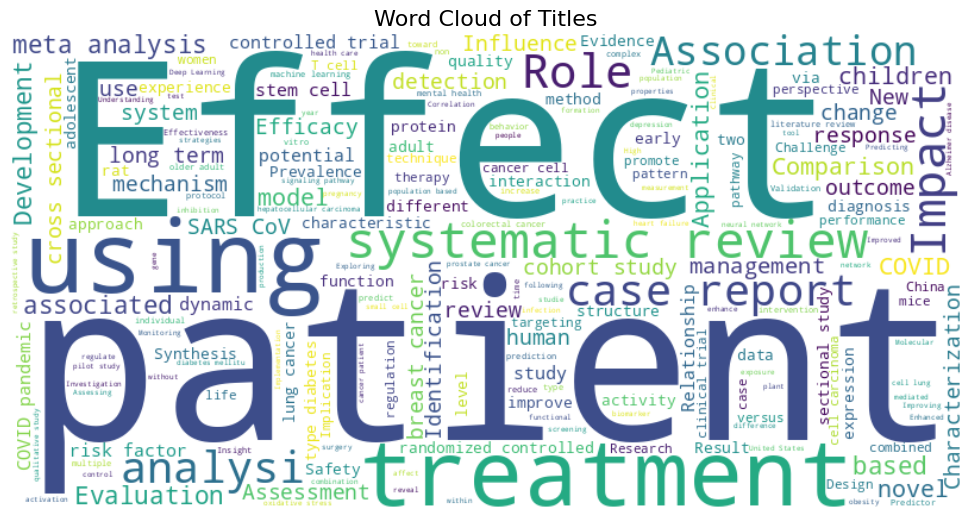

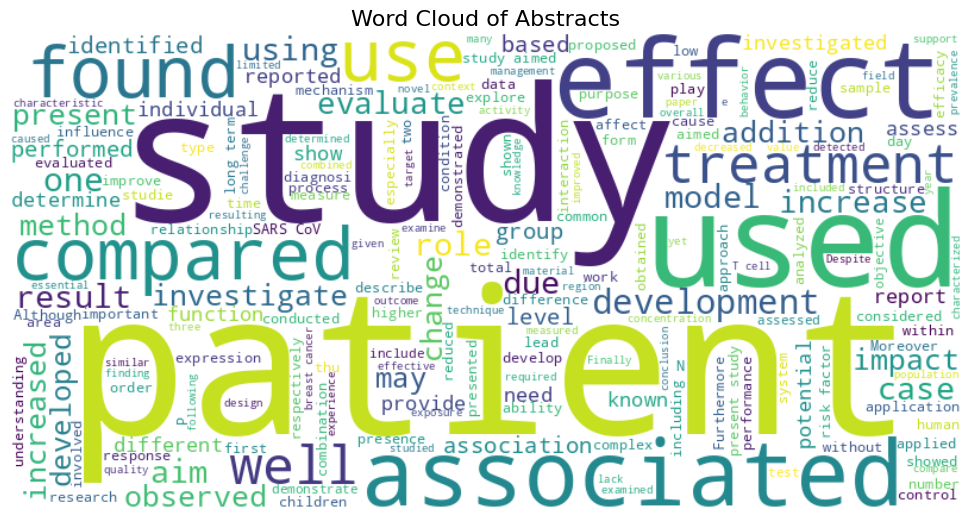

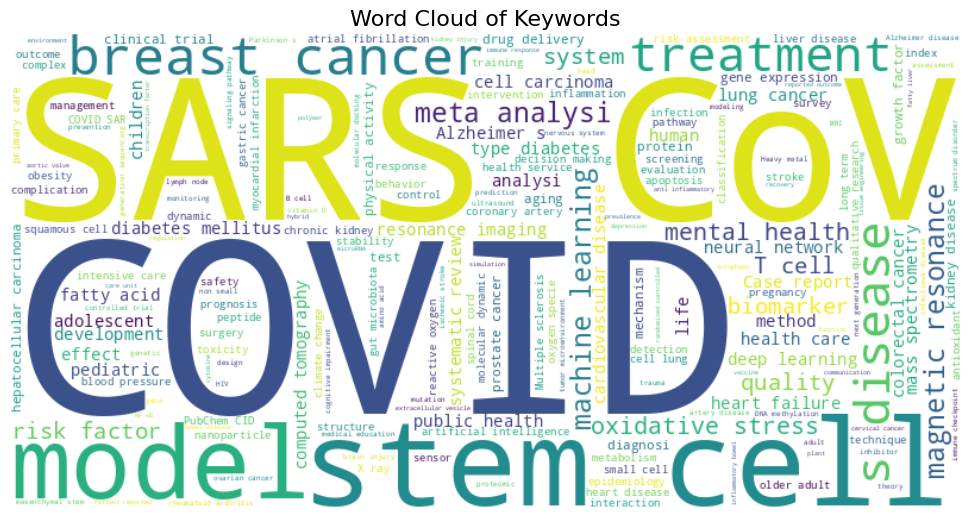

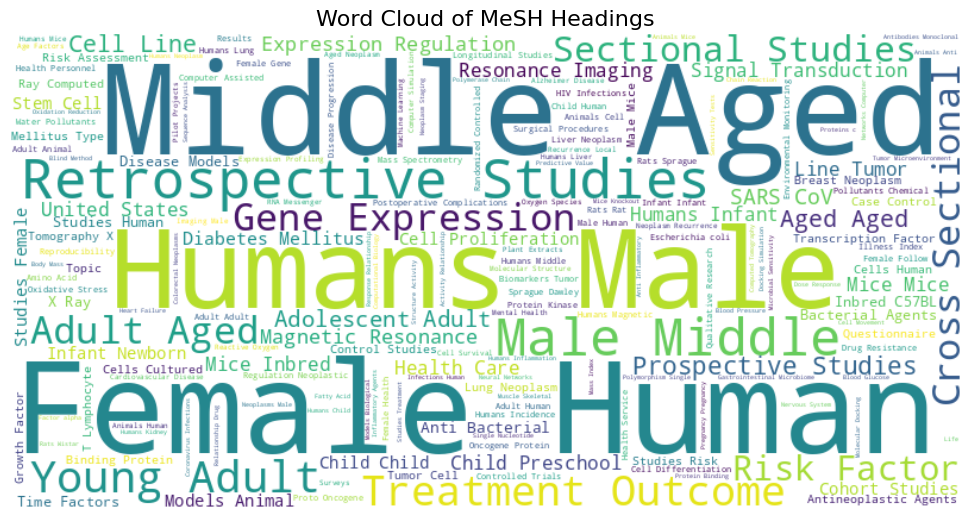

In [ ]:
# Word Clouds for Titles, Keywords, and MeshHeadings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title,fontsize=16)
    plt.tight_layout(pad=0)
    plt.show()

# Word cloud of titles
all_titles = ' '.join(df['Title'])
generate_wordcloud(all_titles, 'Word Cloud of Titles')

# Word cloud of abstracts
all_titles = ' '.join(df['Abstract'])
generate_wordcloud(all_titles, 'Word Cloud of Abstracts')

# Word cloud of keywords
all_keywords = ' '.join(df['Keywords'].dropna())
generate_wordcloud(all_keywords, 'Word Cloud of Keywords')

# Word cloud of MeSH headings
all_mesh = ' '.join(df['MeshHeading'].dropna())
generate_wordcloud(all_mesh, 'Word Cloud of MeSH Headings')

## Top Keywords and MeshHeadings

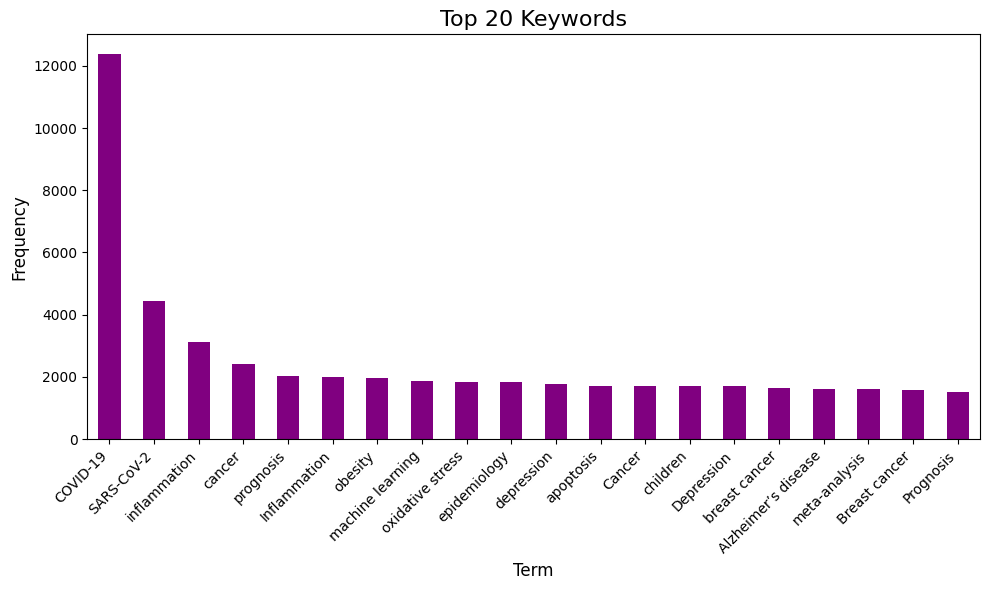

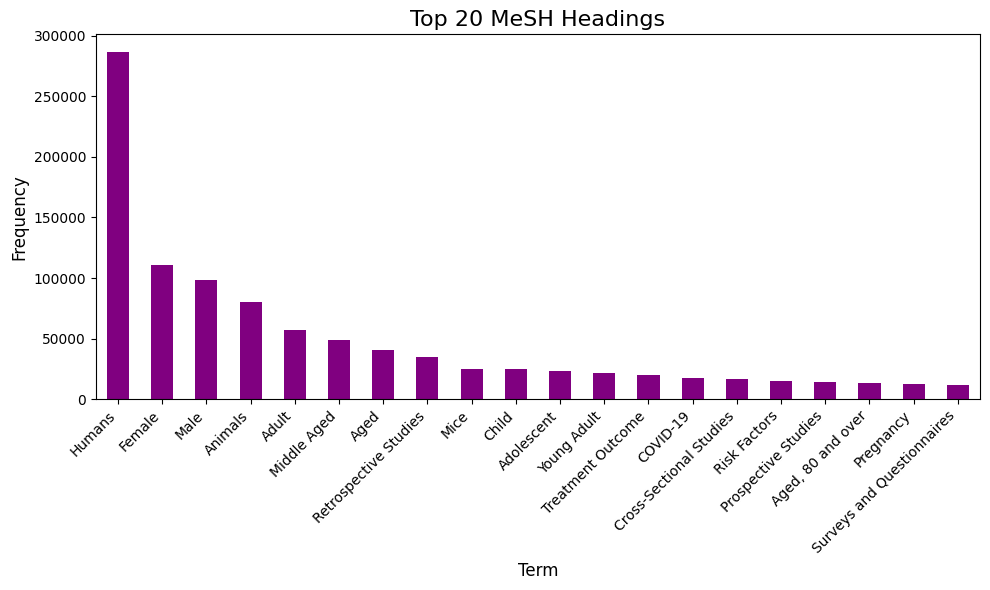

In [ ]:
# Top keywords and MeSH headings
def plot_top_terms(series, title, n=20):
    top_terms = Counter([term.strip() for terms in series.dropna() for term in terms.split(';')])
    plt.figure(figsize=(10, 6))
    pd.Series(top_terms).nlargest(n).plot(kind='bar', color='purple')
    plt.title(f'Top {n} {title}', fontsize = 16)
    plt.ylabel('Frequency',fontsize = 12)
    plt.xlabel('Term', fontsize = 12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_terms(df['Keywords'], 'Keywords')
plot_top_terms(df['MeshHeading'], 'MeSH Headings')

# Entity Exploratory Data Analysis

## Word Cloud of Entities and Top 20 Entities

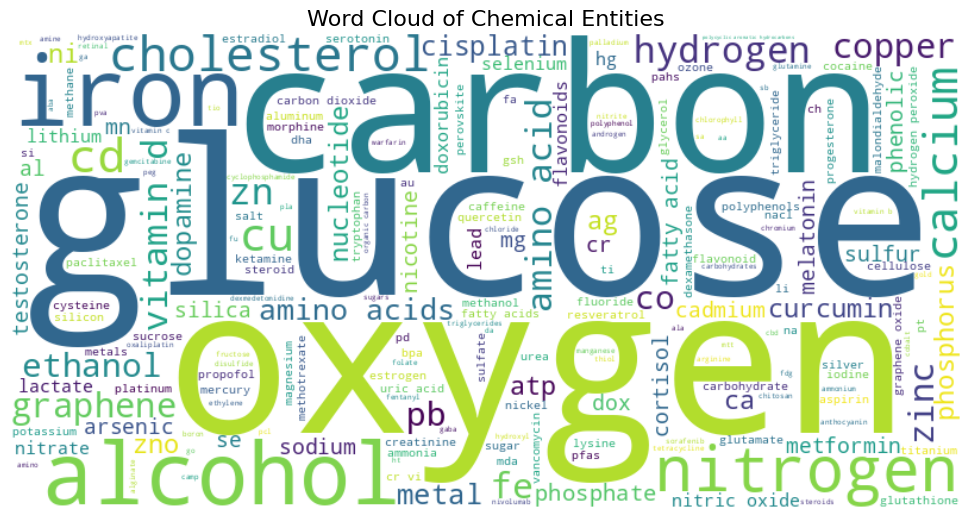

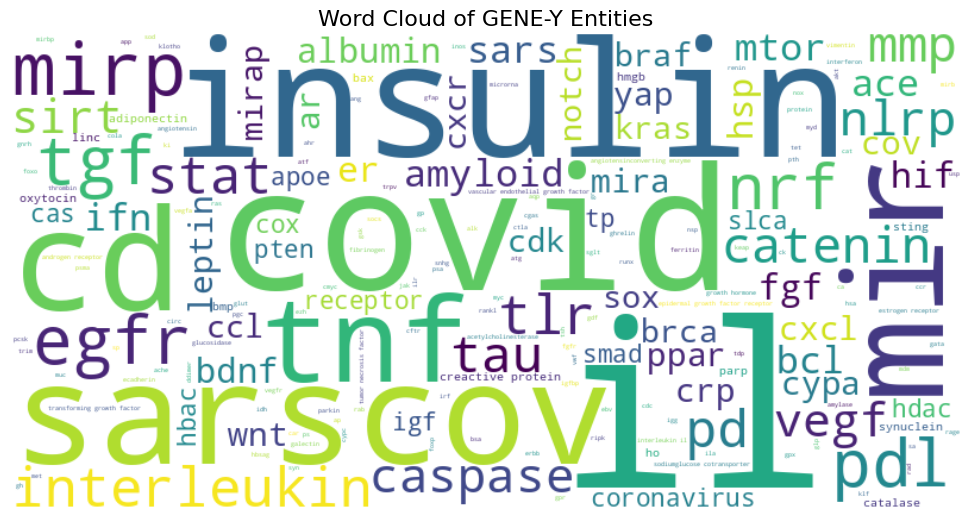

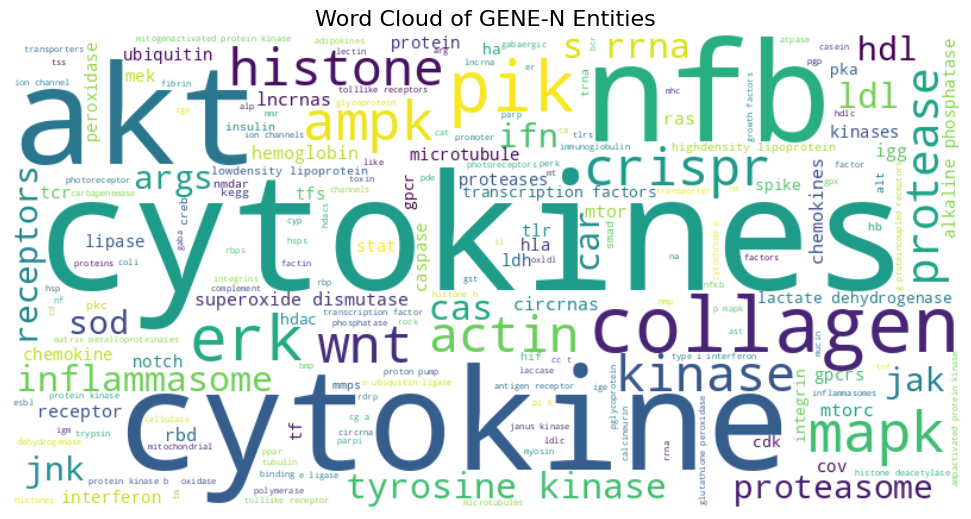

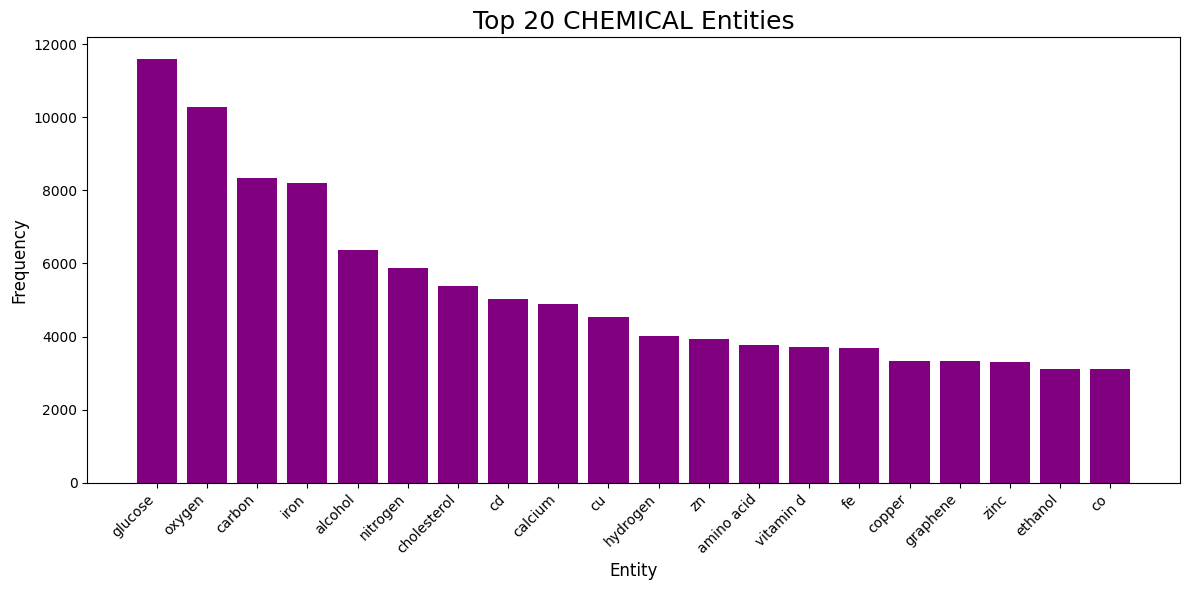

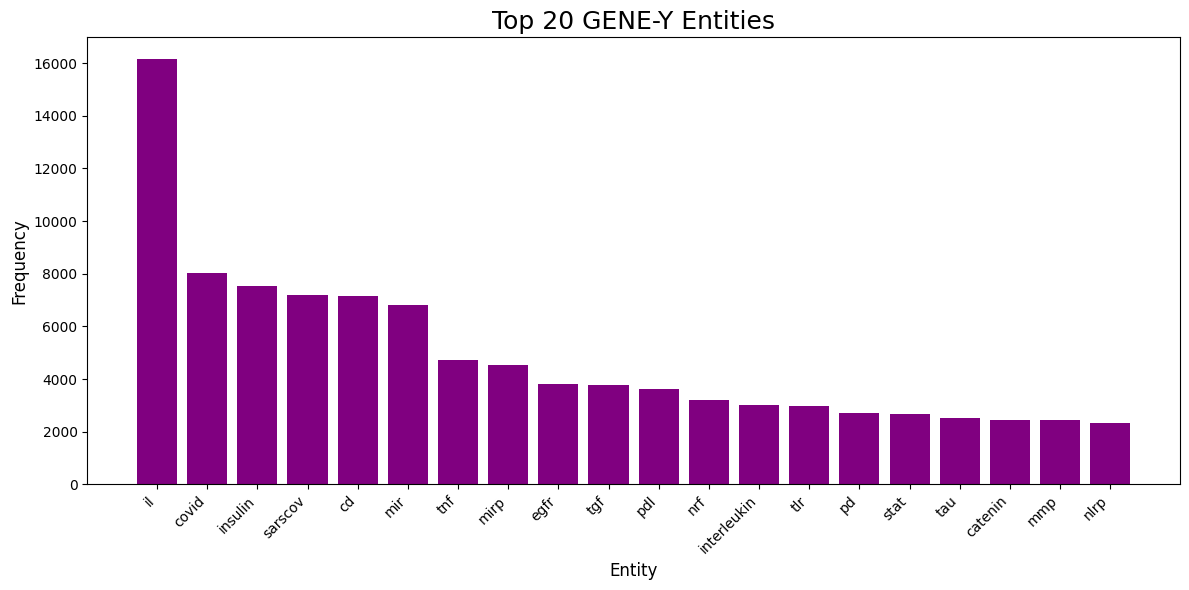

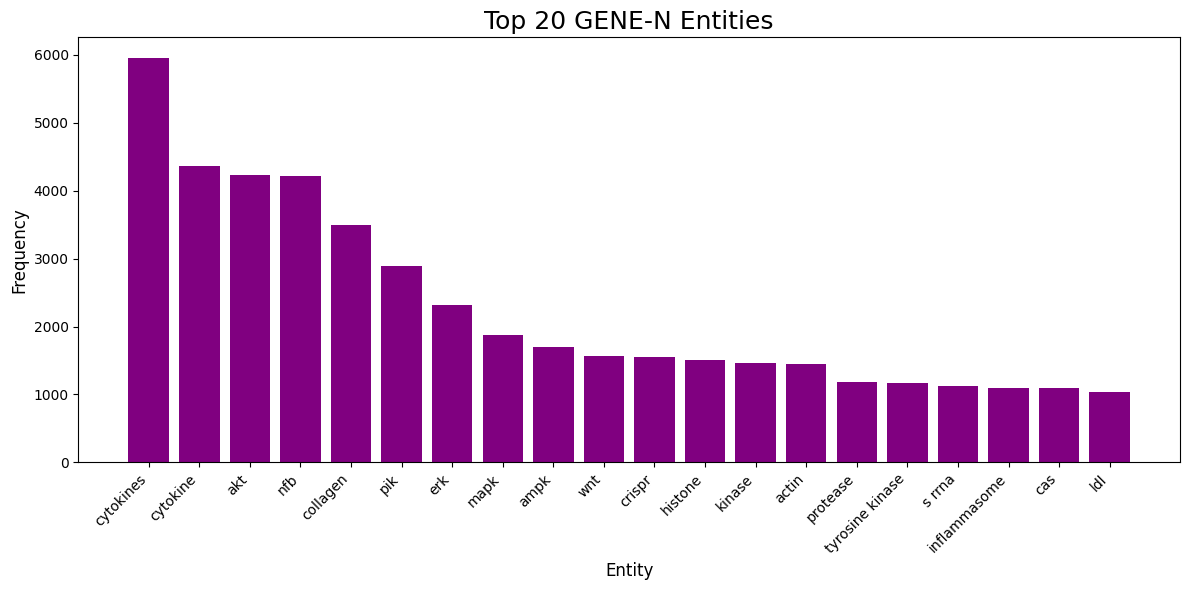

Total CHEMICAL entities: 999233
Total GENE-Y entities: 751283
Total GENE-N entities: 314754

Example CHEMICAL entities:
['colistin', 'polymyxin e', 'carbapenem', 'vitamin d', 'metal']

Example GENE-Y entities:
['apc', 'tolq', 'tolr', 'exbb', 'exbd']

Example GENE-N entities:
['tolqra', 'tol', 'tol system', 'ion channel', 'g proteincoupled receptors']


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import ast
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords', quiet=True)

def clean_entity(entity):
    # Convert to lowercase
    entity = entity.lower()
    # Remove special characters and digits
    entity = re.sub(r'[^a-zA-Z\s]', '', entity)
    # Remove extra whitespace
    entity = ' '.join(entity.split())
    return entity

def is_valid_entity(entity):
    # Check if the entity is not a stopword and has a minimum length
    stop_words = set(stopwords.words('english'))
    return len(entity) > 1 and entity not in stop_words

def parse_entity_string(entity_string):
    if pd.isna(entity_string) or entity_string == '[]':
        return []
    try:
        entities = ast.literal_eval(entity_string)
        return [(clean_entity(e), t) for e, t in entities if is_valid_entity(clean_entity(e))]
    except:
        print(f"Error parsing entity string: {entity_string}")
        return []

def analyze_entities(df):
    all_entities = []
    for _, row in df.iterrows():
        all_entities.extend(parse_entity_string(row['title_entities']))
        all_entities.extend(parse_entity_string(row['abstract_entities']))

    entity_counts = Counter(all_entities)

    chemical_counts = Counter({k: v for (k, t), v in entity_counts.items() if t == 'CHEMICAL'})
    gene_y_counts = Counter({k: v for (k, t), v in entity_counts.items() if t == 'GENE-Y'})
    gene_n_counts = Counter({k: v for (k, t), v in entity_counts.items() if t == 'GENE-N'})

    return chemical_counts, gene_y_counts, gene_n_counts

def plot_top_entities(counts, entity_type, n=20):
    top_n = counts.most_common(n)
    entities, frequencies = zip(*top_n)

    plt.figure(figsize=(12, 6))
    plt.bar(entities, frequencies, color='purple')
    plt.title(f'Top {n} {entity_type} Entities', fontsize=18)
    plt.xlabel('Entity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def generate_wordcloud(counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout(pad=0)
    plt.show()

# Analyze entities
chemical_counts, gene_y_counts, gene_n_counts = analyze_entities(df)

# Generate word clouds
generate_wordcloud(chemical_counts, 'Word Cloud of Chemical Entities')
generate_wordcloud(gene_y_counts, 'Word Cloud of GENE-Y Entities')
generate_wordcloud(gene_n_counts, 'Word Cloud of GENE-N Entities')

# Plot top 20 entities for each type
plot_top_entities(chemical_counts, 'CHEMICAL')
plot_top_entities(gene_y_counts, 'GENE-Y')
plot_top_entities(gene_n_counts, 'GENE-N')

# Print total counts for each entity type
print(f"Total CHEMICAL entities: {sum(chemical_counts.values())}")
print(f"Total GENE-Y entities: {sum(gene_y_counts.values())}")
print(f"Total GENE-N entities: {sum(gene_n_counts.values())}")

# Print some example entities for each type
print("\nExample CHEMICAL entities:")
print(list(chemical_counts.keys())[:5])
print("\nExample GENE-Y entities:")
print(list(gene_y_counts.keys())[:5])
print("\nExample GENE-N entities:")
print(list(gene_n_counts.keys())[:5])

## Entity Type Distribution

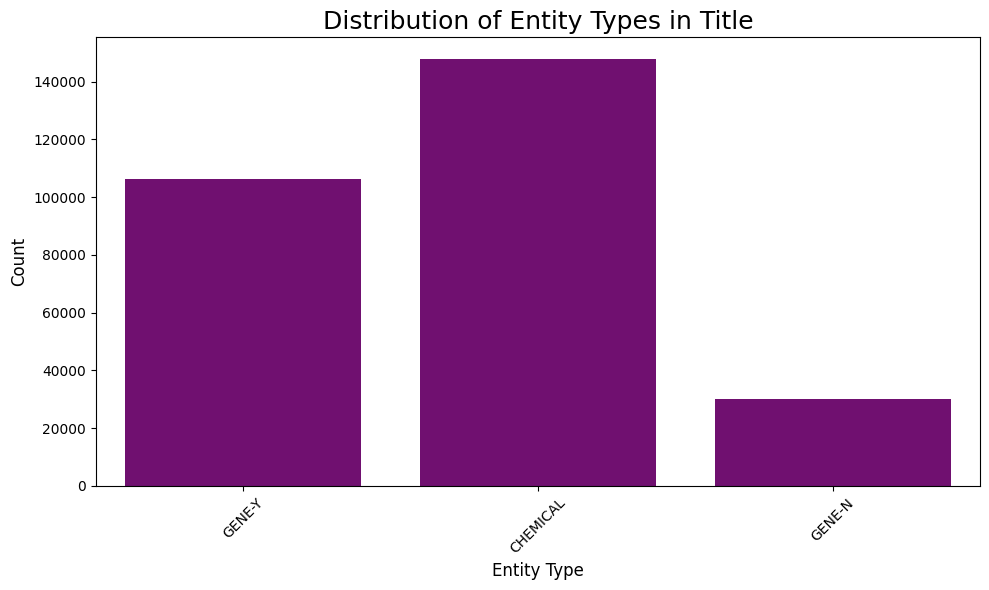

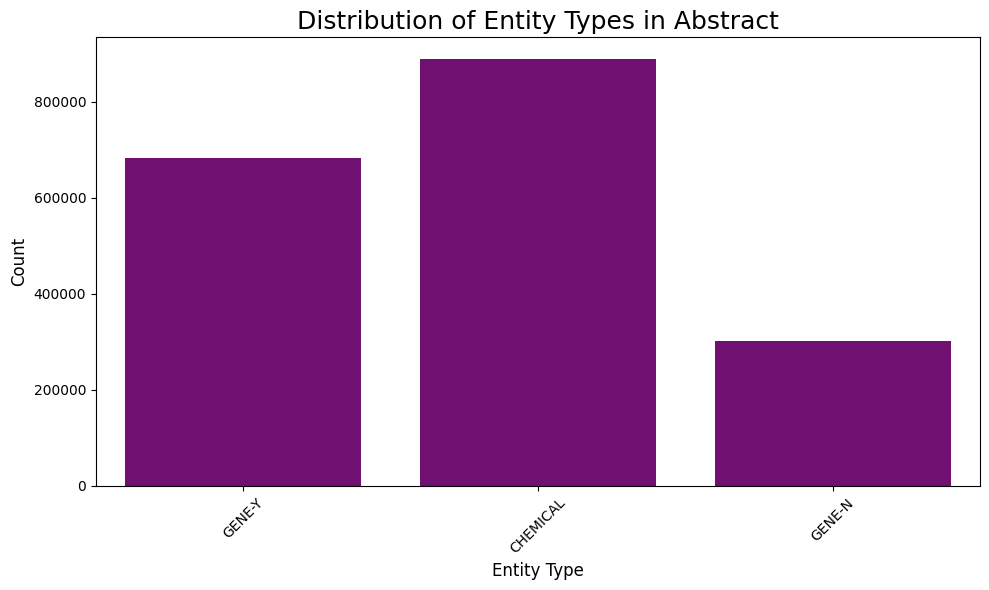

In [ ]:
# Distribution of Entity Type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
from wordcloud import WordCloud
import ast

# Convert string representations of lists to actual lists
df['title_entities'] = df['title_entities'].apply(ast.literal_eval)
df['abstract_entities'] = df['abstract_entities'].apply(ast.literal_eval)

# Entity Type Distribution
def plot_entity_type_distribution(entities, title):
    entity_types = [entity[1] for sublist in entities for entity in sublist]
    type_counts = Counter(entity_types)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(type_counts.keys()), y=list(type_counts.values()), color = 'purple')
    plt.title(f'Distribution of Entity Types in {title}', fontsize = 18)
    plt.xlabel('Entity Type', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig(f'{title.lower().replace(" ", "_")}_entity_type_distribution.png')
    #plt.close()

plot_entity_type_distribution(df['title_entities'], 'Title')
plot_entity_type_distribution(df['abstract_entities'], 'Abstract')

## Time Series Analysis of Entity Mentions

Time series plot for GENE-Y entities has been saved.
Time series plot for GENE-N entities has been saved.
Time series plot for CHEMICAL entities has been saved.


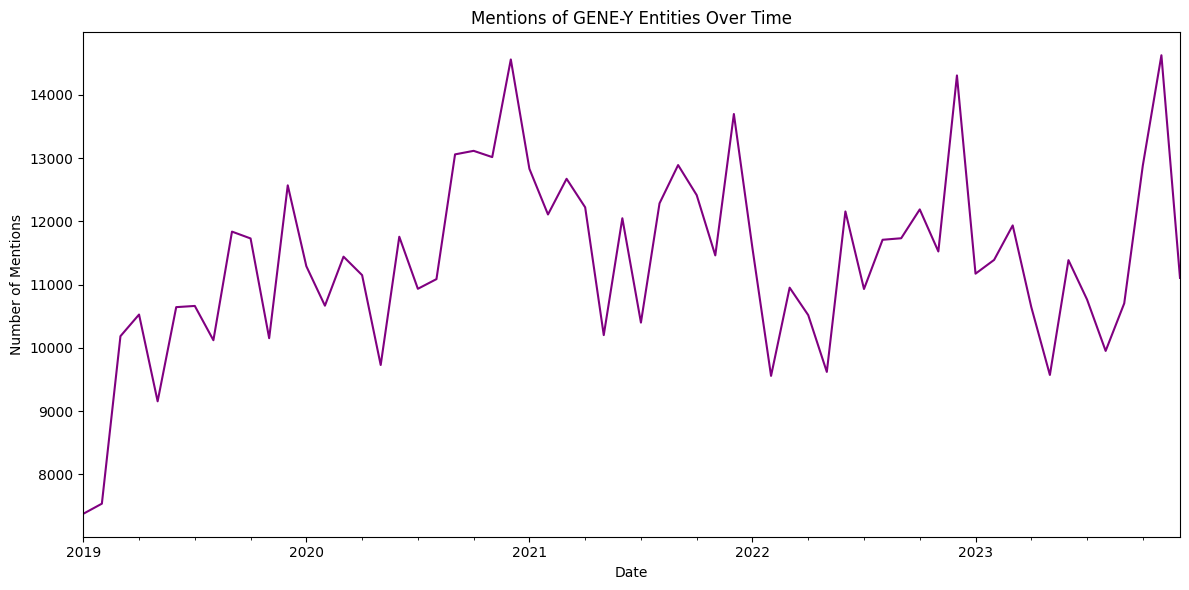

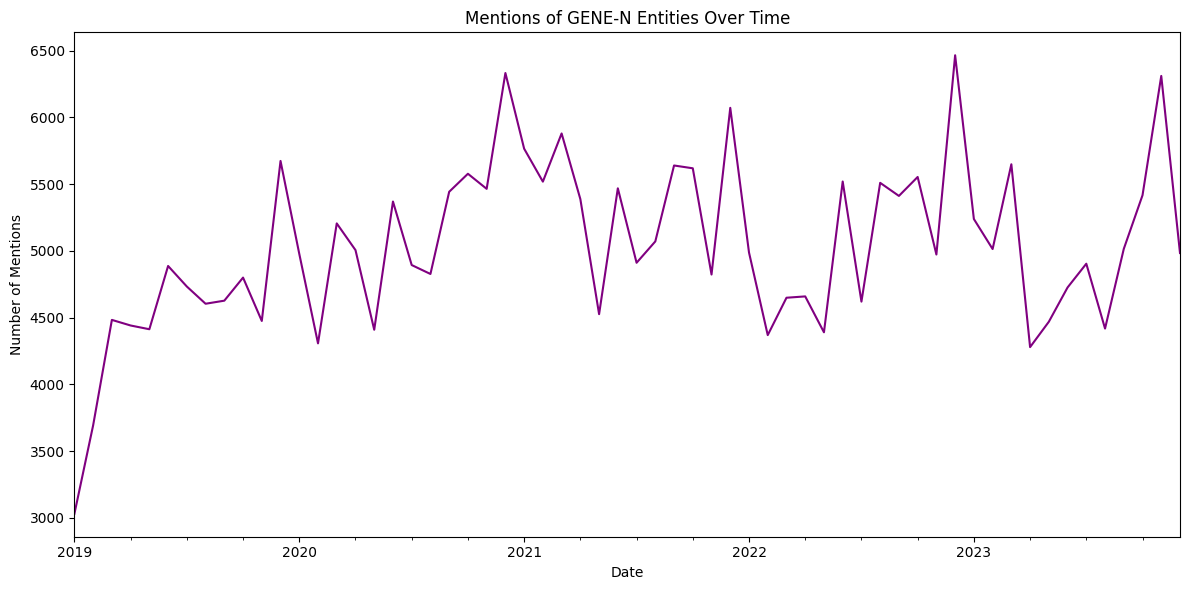

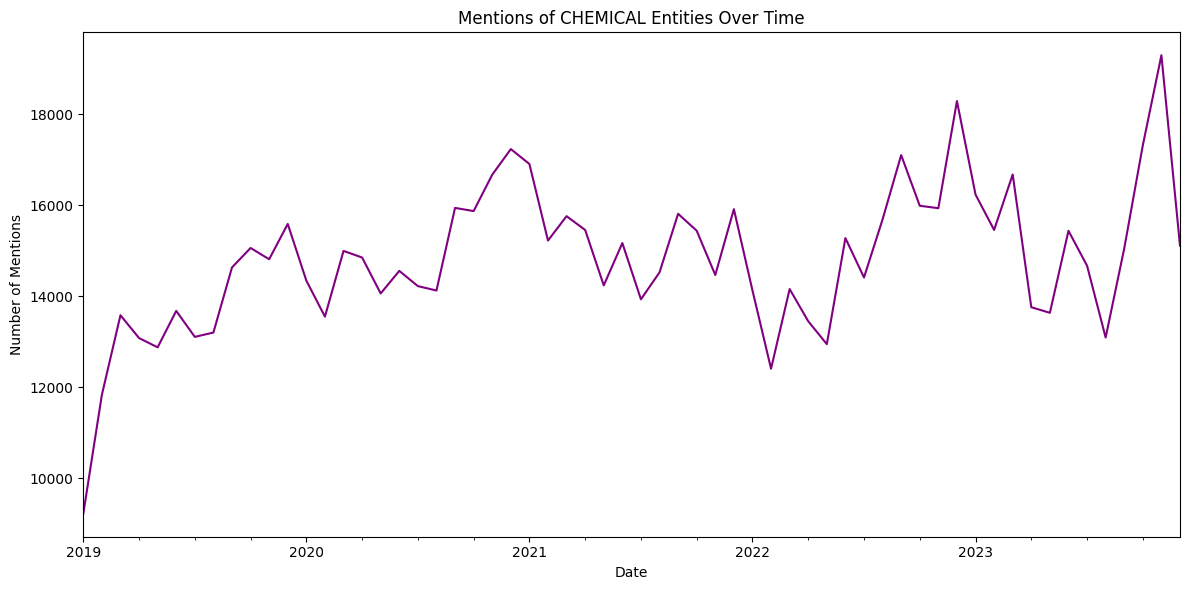

In [ ]:
# Time Series Analysis of Entity Mentions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

def plot_entity_mentions_over_time(df, entity_type):
    try:
        # Convert 'Date' to datetime, coerce errors to NaT
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

        # Drop rows with NaT values
        df = df.dropna(subset=['Date'])

        if df.empty:
            print("No valid dates found after conversion. Please check your date format.")
            return

        df['Year-Month'] = df['Date'].dt.to_period('M')

        # Ensure 'abstract_entities' is a list
        df['abstract_entities'] = df['abstract_entities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

        entity_counts = df.groupby('Year-Month').apply(lambda x: sum(
            [sum(1 for entity in sublist if isinstance(sublist, list) and len(entity) > 1 and entity[1] == entity_type)
             for sublist in x['abstract_entities']]
        ))

        if entity_counts.empty:
            print(f"No {entity_type} entities found in the abstracts. Please check your entity type and data.")
            return

        plt.figure(figsize=(12, 6))
        entity_counts.plot(color = 'purple')
        plt.title(f'Mentions of {entity_type} Entities Over Time', fontsize = 18)
        plt.xlabel('Date', fontsize = 12)
        plt.ylabel('Number of Mentions', fontsize = 12)
        plt.tight_layout()
        #plt.savefig(f'{entity_type.lower()}_mentions_over_time.png')
        #plt.close()

        print(f"Time series plot for {entity_type} entities has been saved.")

    except Exception as e:
        print(f"An error occurred: {e}")
        print("\nHere's some information about your DataFrame:")
        print(df.info())
        print("\nFirst few rows of 'Date' column:")
        print(df['Date'].head())
        print("\nFirst few rows of 'abstract_entities' column:")
        print(df['abstract_entities'].head())

# Try to plot the time series
try:
    plot_entity_mentions_over_time(df, 'GENE-Y')
    plot_entity_mentions_over_time(df, 'GENE-N')
    plot_entity_mentions_over_time(df, 'CHEMICAL')
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Entity-MeSH Term Association

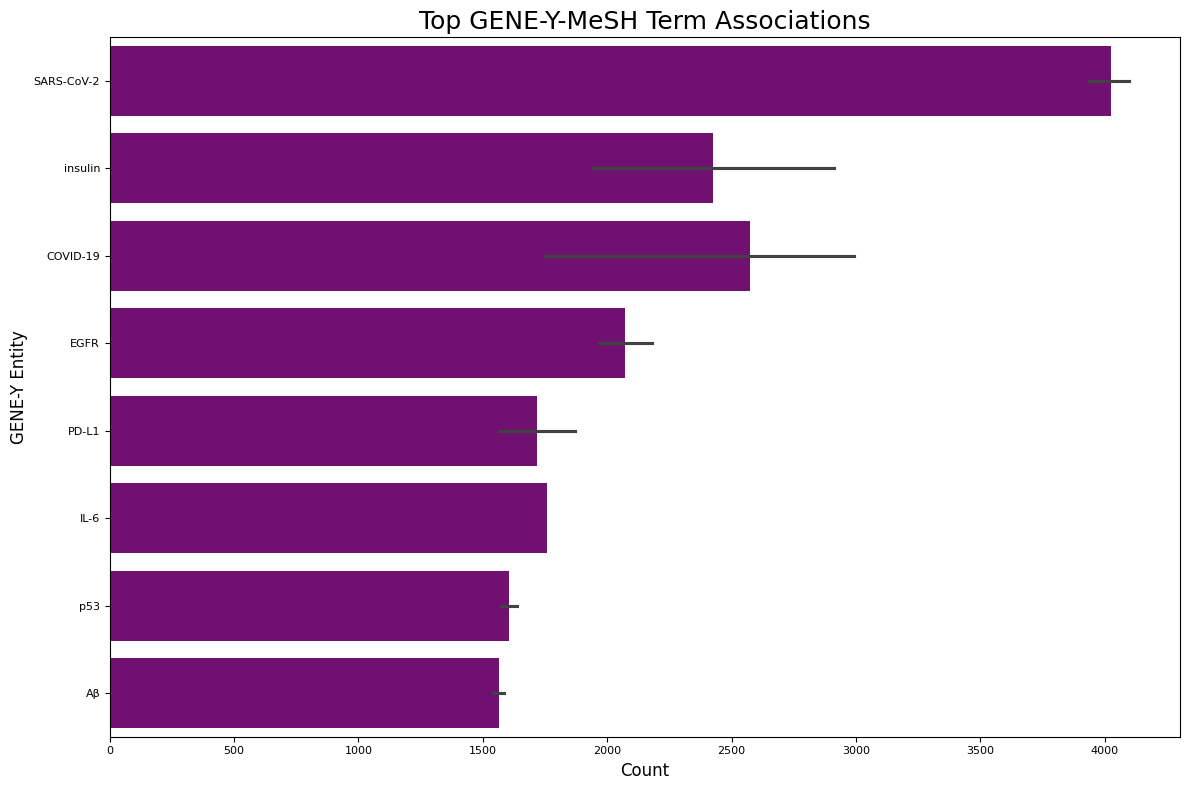

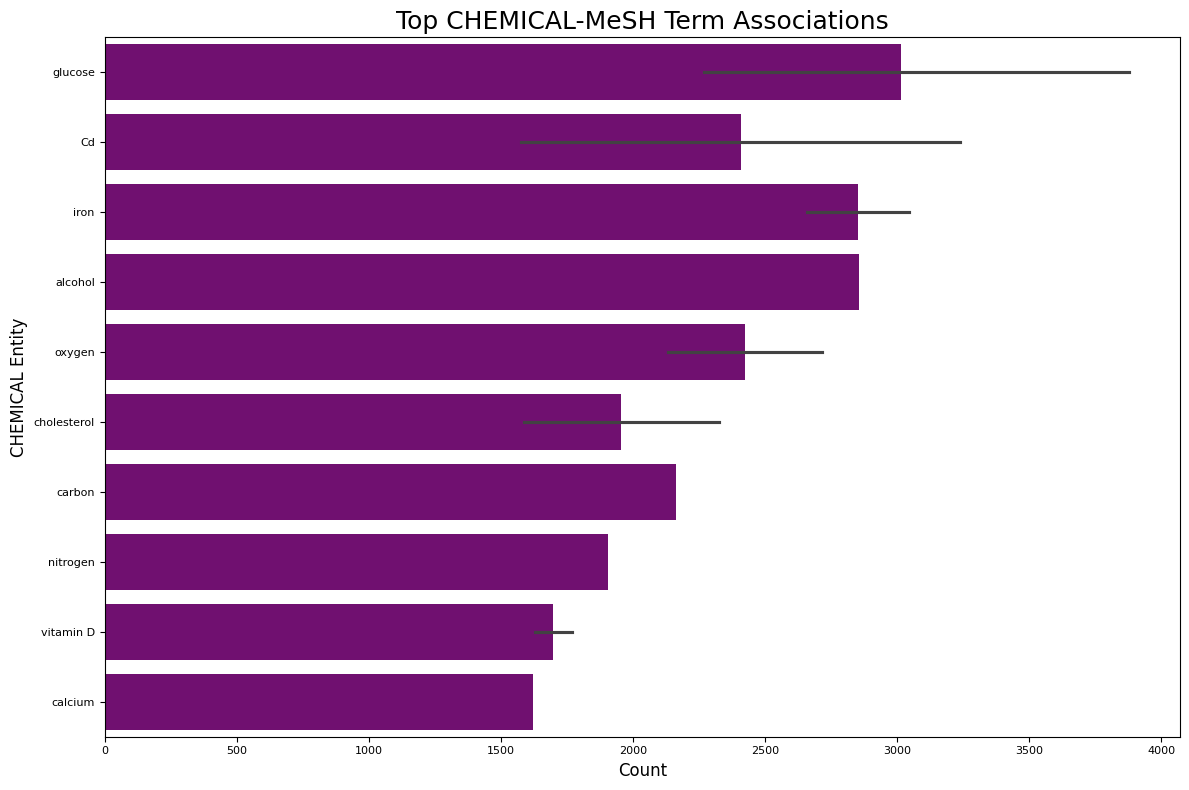

In [ ]:
# Entity-MeSH Term Association
def plot_entity_mesh_association(df, entity_type):
    entity_mesh_pairs = []
    for _, row in df.iterrows():
        # Check if MeshHeading is a string before splitting
        if isinstance(row['MeshHeading'], str):
            mesh_terms = row['MeshHeading'].split(';')
        else:
            continue  # Skip this row if MeshHeading is not a string

        # Check if abstract_entities is a list before processing
        if isinstance(row['abstract_entities'], list):
            entities = [entity[0] for entity in row['abstract_entities'] if entity[1] == entity_type]
        else:
            continue  # Skip this row if abstract_entities is not a list

        for entity in entities:
            for mesh in mesh_terms:
                entity_mesh_pairs.append((entity, mesh.strip()))

    if not entity_mesh_pairs:
        print(f"No {entity_type}-MeSH associations found. Check your data and entity type.")
        return

    pair_counts = Counter(entity_mesh_pairs)
    top_pairs = pair_counts.most_common(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=[pair[1] for pair in top_pairs], y=[pair[0][0] for pair in top_pairs], color = 'purple')
    plt.title(f'Top {entity_type}-MeSH Term Associations', fontsize = 18)
    plt.xlabel('Count', fontsize = 12)
    plt.ylabel(f'{entity_type} Entity', fontsize = 12)
    # Adjusting the font size of the y-axis (entity names)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    #plt.savefig(f'{entity_type.lower()}_mesh_association.png')
    #plt.close()

# Plot the associations
try:
    plot_entity_mesh_association(df, 'GENE-Y')
    plot_entity_mesh_association(df, 'CHEMICAL')
except Exception as e:
    print(f"An error occurred: {e}")
    print("Here's some information about your DataFrame:")
    print(df.info())
    print("\nFirst few rows of 'MeshHeading' column:")
    print(df['MeshHeading'].head())
    print("\nFirst few rows of 'abstract_entities' column:")
    print(df['abstract_entities'].head())
#print("Advanced EDA complete. Check the generated plots for results.")

# Relationship Exploratory Data Analysis

In [ ]:
relationship_df = pd.read_csv('/content/drive/MyDrive/cleaned_data/pubmed_data_with_relationships.csv')
relationship_df.head(5)

article_id                      entity1 entity1_type  \
0           1                          APC       GENE-Y   
1          10                  ion channel       GENE-N   
2          10                  ion channel       GENE-N   
3          10                  ion channel       GENE-N   
4          10  G protein-coupled receptors       GENE-N   

                       entity2 entity2_type relationship  confidence  
0                          APC       GENE-Y      AGONIST    0.592381  
1  G protein-coupled receptors       GENE-N      AGONIST    0.567602  
2                         GPCR       GENE-N      AGONIST    0.567602  
3             nuclear receptor       GENE-N      AGONIST    0.567602  
4                         GPCR       GENE-N      AGONIST    0.567602

# Distribution of Relationship Types and Directionality Distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import seaborn as sns

def analyze_relationships(df, training_relationships):
    relationship_counts = Counter(df['relationship'])
    missing_relationships = set(training_relationships) - set(relationship_counts.keys())
    total_relationships = sum(relationship_counts.values())
    relationship_percentages = {k: v/total_relationships*100 for k, v in relationship_counts.items()}

    # Analyze relationship directionality
    directional_counts = defaultdict(lambda: defaultdict(int))
    for _, row in df.iterrows():
        direction = get_direction(row['entity1_type'], row['entity2_type'])
        directional_counts[row['relationship']][direction] += 1

    # Visualize relationship distribution
    plt.figure(figsize=(12, 6))
    plt.bar(relationship_percentages.keys(), relationship_percentages.values(), color = 'purple')
    plt.title('Distribution of Relationship Types', fontsize = 18)
    plt.xlabel('Relationship Type', fontsize = 14)
    plt.ylabel('Percentage', fontsize = 14)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.tight_layout()

    return {
        'relationship_counts': dict(relationship_counts),
        'missing_relationships': list(missing_relationships),
        'directional_counts': directional_counts,
        'total_relationships': total_relationships
    }


def get_direction(entity1_type, entity2_type):
    if entity1_type == 'CHEMICAL' and entity2_type in ['GENE-Y', 'GENE-N']:
        return 'CHEMICAL -> GENE'
    elif entity1_type in ['GENE-Y', 'GENE-N'] and entity2_type == 'CHEMICAL':
        return 'GENE -> CHEMICAL'
    elif entity1_type in ['GENE-Y', 'GENE-N'] and entity2_type in ['GENE-Y', 'GENE-N']:
        return 'GENE -> GENE'
    elif entity1_type == 'CHEMICAL' and entity2_type == 'CHEMICAL':
        return 'CHEMICAL -> CHEMICAL'
    else:
        return 'OTHER'

def visualize_directionality(directional_counts):
    relationships = list(directional_counts.keys())
    directions = ['CHEMICAL -> GENE', 'GENE -> CHEMICAL', 'GENE -> GENE', 'CHEMICAL -> CHEMICAL', 'OTHER']

    data = []
    for rel in relationships:
        for direction in directions:
            count = directional_counts[rel].get(direction, 0)
            data.append({'Relationship': rel, 'Direction': direction, 'Count': count})

    df = pd.DataFrame(data)

    plt.figure(figsize=(15, 10))
    sns.barplot(x='Relationship', y='Count', hue='Direction', data=df)

    # Adjust font size and move legend inside the plot
    plt.title('Directionality Distribution of Each Relationship Type', fontsize = 20)
    plt.xlabel('Relationship Type', fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.legend(title='Direction', loc='upper right', fontsize = 14)
    plt.tight_layout()

def print_analysis_results(results):
    print("Relationship Type Distribution:")
    for rel_type, count in results['relationship_counts'].items():
        print(f"{rel_type}: {count} ({count/results['total_relationships']*100:.2f}%)")

    print("\nMissing Relationship Types:")
    for rel_type in results['missing_relationships']:
        print(rel_type)

    print("\nDirectional Distribution:")
    for rel_type, directions in results['directional_counts'].items():
        print(f"\n{rel_type}:")
        for direction, count in directions.items():
            print(f"  {direction}: {count}")

    print(f"\nTotal Relationships: {results['total_relationships']}")

Relationship Type Distribution:
AGONIST: 800758 (13.73%)
ANTAGONIST: 705517 (12.09%)
INDIRECT-DOWNREGULATOR: 634348 (10.87%)
ACTIVATOR: 340832 (5.84%)
DIRECT-REGULATOR: 729907 (12.51%)
SUBSTRATE_PRODUCT-OF: 1063123 (18.22%)
SUBSTRATE: 1243656 (21.32%)
INHIBITOR: 48582 (0.83%)
AGONIST-ACTIVATOR: 220773 (3.78%)
INDIRECT-UPREGULATOR: 46223 (0.79%)

Missing Relationship Types:
AGONIST-INHIBITOR
PART-OF
PRODUCT-OF

Directional Distribution:

AGONIST:
  GENE -> GENE: 601268
  CHEMICAL -> CHEMICAL: 60066
  GENE -> CHEMICAL: 75167
  CHEMICAL -> GENE: 64257

ANTAGONIST:
  CHEMICAL -> CHEMICAL: 95917
  GENE -> GENE: 439196
  CHEMICAL -> GENE: 97164
  GENE -> CHEMICAL: 73240

INDIRECT-DOWNREGULATOR:
  CHEMICAL -> CHEMICAL: 331703
  CHEMICAL -> GENE: 44050
  GENE -> GENE: 210132
  GENE -> CHEMICAL: 48463

ACTIVATOR:
  CHEMICAL -> CHEMICAL: 178977
  CHEMICAL -> GENE: 46083
  GENE -> CHEMICAL: 42322
  GENE -> GENE: 73450

DIRECT-REGULATOR:
  CHEMICAL -> CHEMICAL: 386745
  CHEMICAL -> GENE: 76399
  G

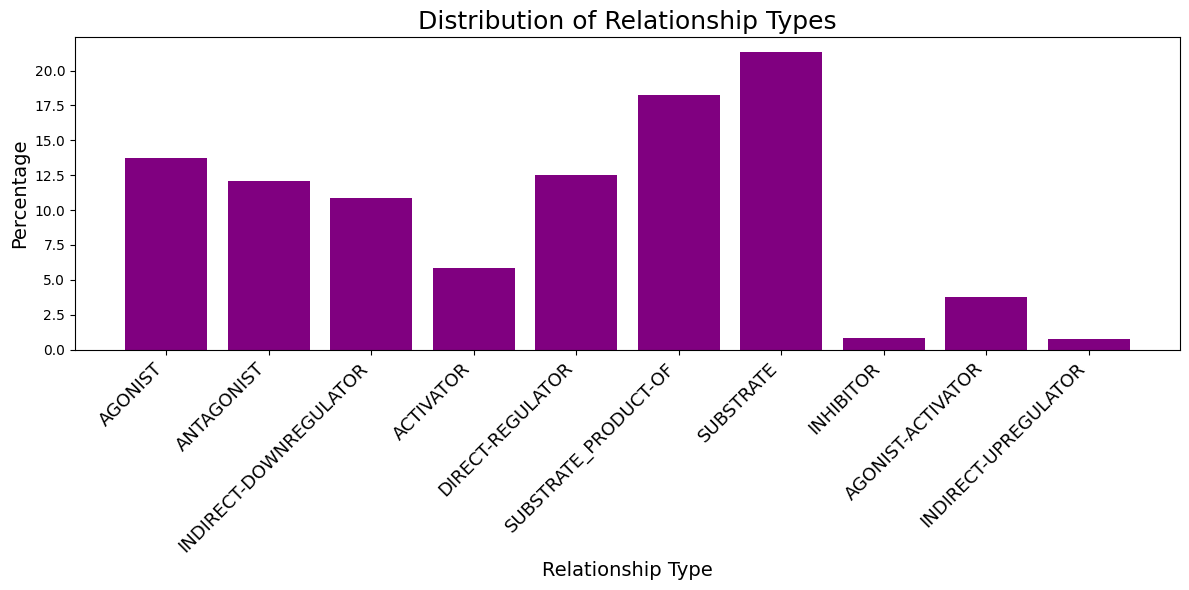

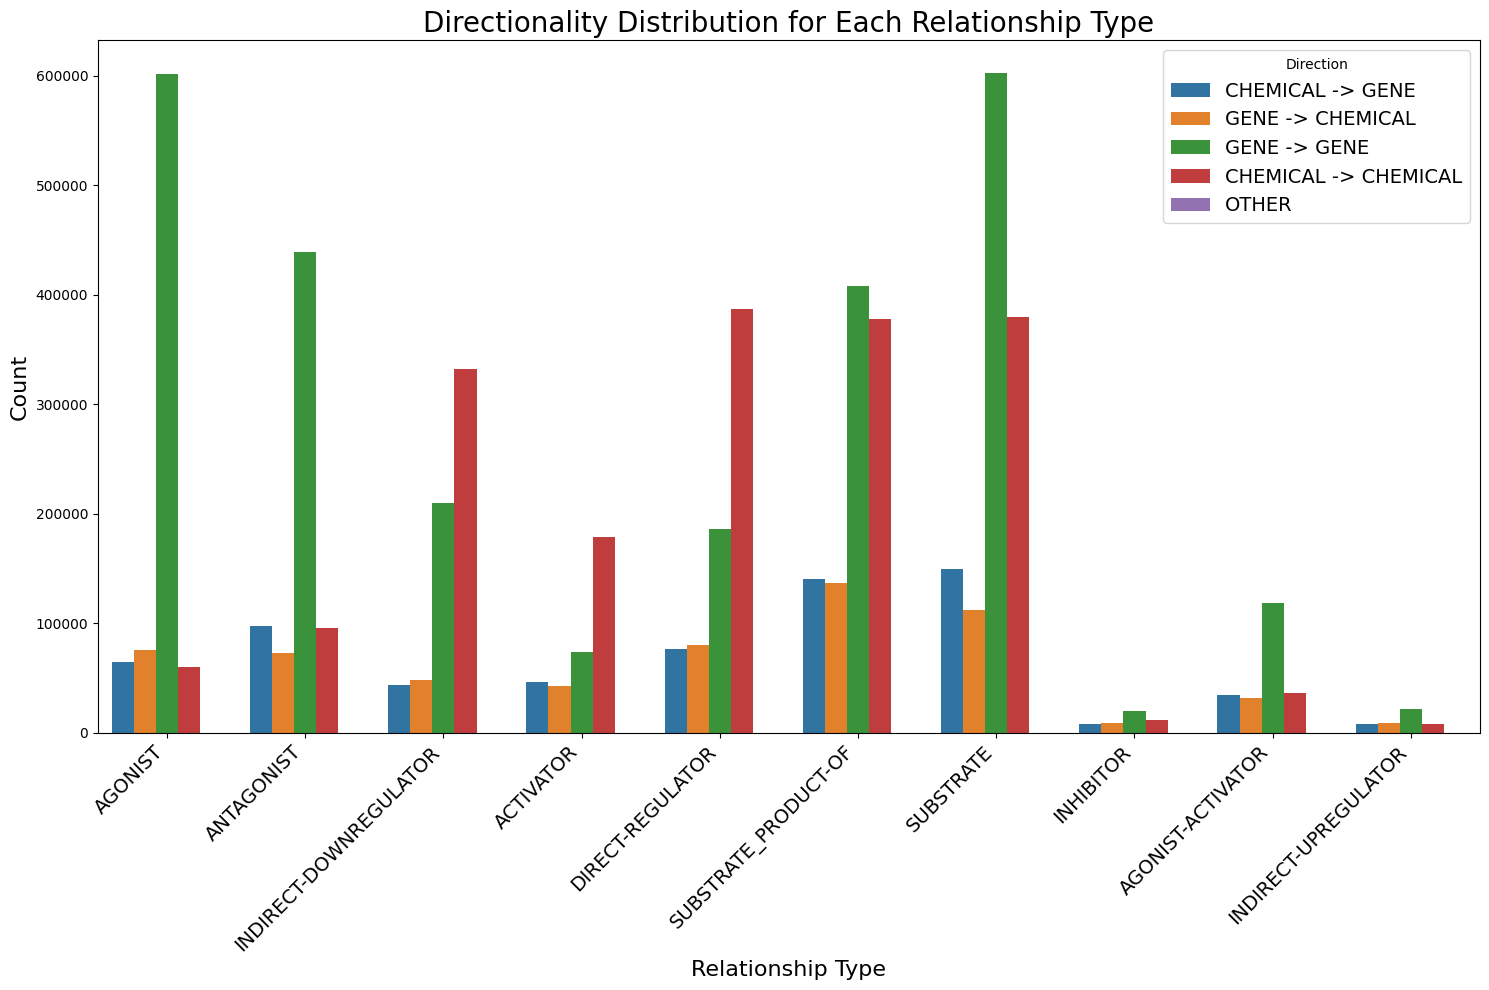

In [ ]:
# Usage
training_relationships = ['INHIBITOR', 'DIRECT-REGULATOR', 'SUBSTRATE', 'ACTIVATOR',
                          'INDIRECT-UPREGULATOR', 'INDIRECT-DOWNREGULATOR', 'ANTAGONIST',
                          'PRODUCT-OF', 'PART-OF', 'AGONIST', 'AGONIST-ACTIVATOR',
                          'SUBSTRATE_PRODUCT-OF', 'AGONIST-INHIBITOR']

analysis_results = analyze_relationships(relationship_df, training_relationships)
print_analysis_results(analysis_results)
visualize_directionality(analysis_results['directional_counts'])

def generate_recommendations(analysis_results):
    recommendations = []

    if len(analysis_results['missing_relationships']) > 0:
        recommendations.append("Investigate why 'PART-OF', 'INDIRECT-DOWNREGULATOR', and 'AGONIST-INHIBITOR' are missing from your results.")

    if min(analysis_results['relationship_counts'].values()) < 100:
        recommendations.append("Some relationship types have very low counts. Consider if you need more data or if these types are relevant for your analysis.")

    # Analyze directionality patterns
    for rel_type, directions in analysis_results['directional_counts'].items():
        total = sum(directions.values())
        for direction, count in directions.items():
            if count / total > 0.8:  # If any direction is more than 80% of a relationship type
                recommendations.append(f"The relationship '{rel_type}' is predominantly in the '{direction}' direction ({count/total*100:.2f}%). Consider the biological implications of this.")

    return recommendations

recommendations = generate_recommendations(analysis_results)
print("\nRecommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# Distribution of Condience Score

count    5.833719e+06
mean     6.013866e-01
std      1.954980e-01
min      1.401160e-01
25%      4.432502e-01
50%      5.825119e-01
75%      7.570435e-01
max      9.913955e-01
Name: confidence, dtype: float64

Average Confidence Score by Relationship Type:
relationship
AGONIST                   0.716282
SUBSTRATE_PRODUCT-OF      0.641705
INDIRECT-DOWNREGULATOR    0.612933
INHIBITOR                 0.601702
INDIRECT-UPREGULATOR      0.591344
DIRECT-REGULATOR          0.570691
ANTAGONIST                0.562960
ACTIVATOR                 0.555853
SUBSTRATE                 0.550023
AGONIST-ACTIVATOR         0.543276
Name: confidence, dtype: float64

Top 10 Highest Confidence Interactions:
                       entity1                      entity2  \
5760813             tyrosinase             agarozizanol a-f   
5760814             tyrosinase                α-glucosidase   
5760815             tyrosinase                   tyrosinase   
5760816             tyrosinase  2-(2-phenylethyl) chro

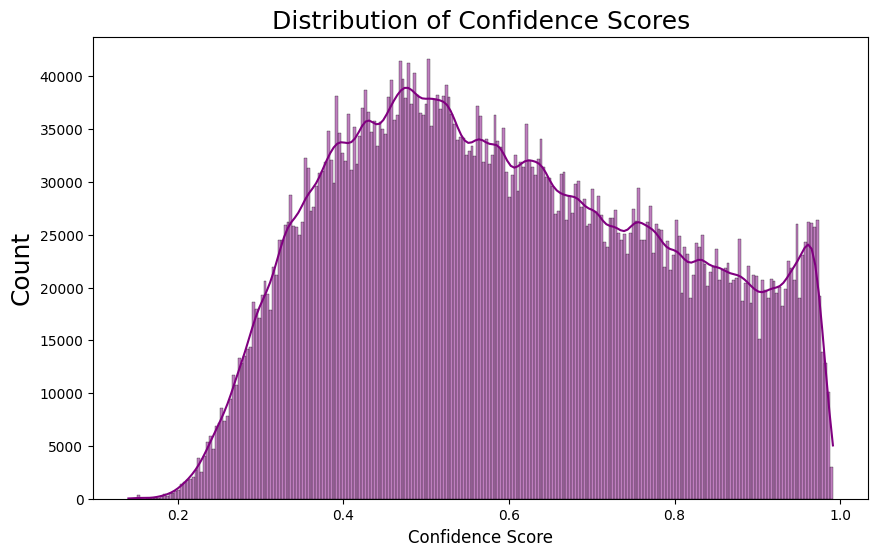

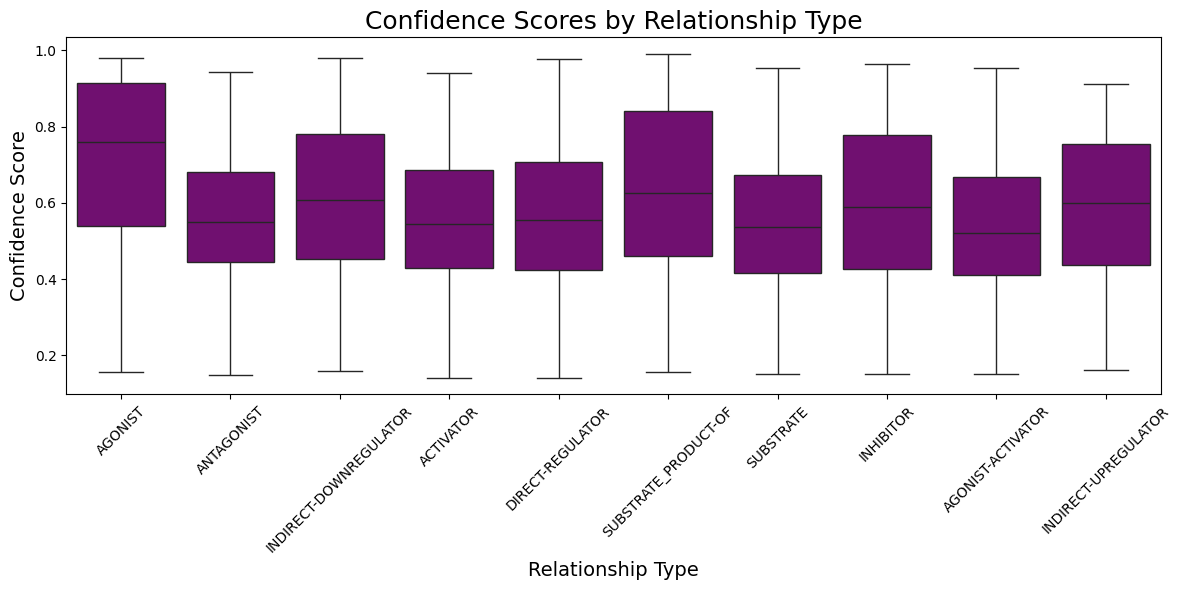

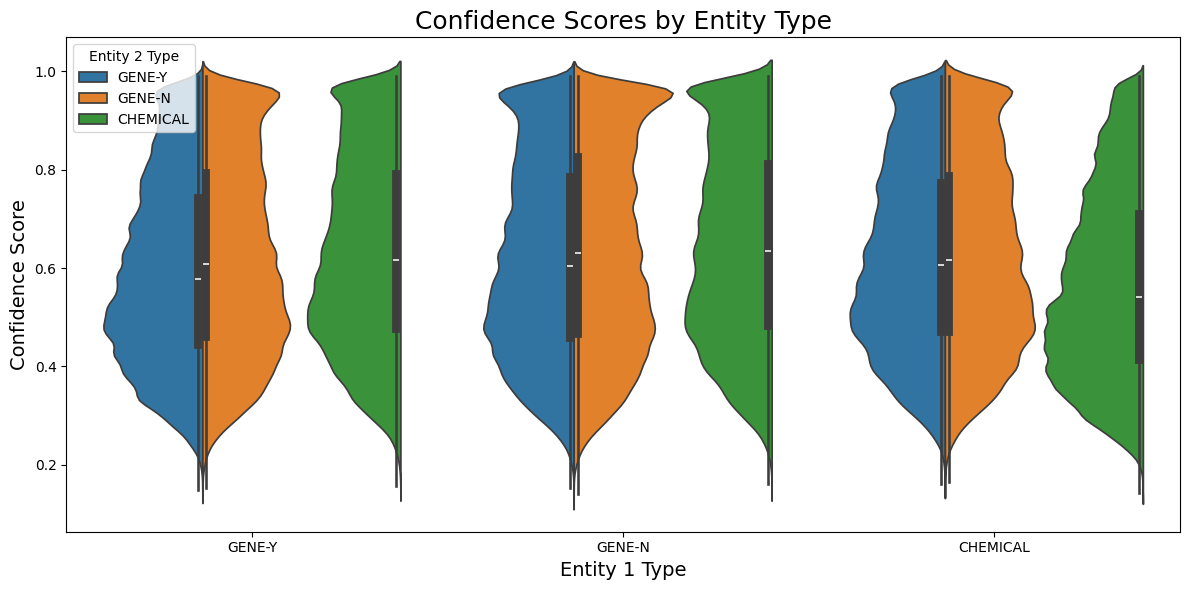

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(relationship_df['confidence'].describe())

# Distribution of confidence scores
plt.figure(figsize=(10, 6))
sns.histplot(data=relationship_df, x='confidence', kde=True, color = 'purple')
plt.title('Distribution of Confidence Scores', fontsize = 18)
plt.xlabel('Confidence Score', fontsize = 12)
plt.ylabel('Count', fontsize = 18)
# plt.savefig('confidence_distribution.png')
#　plt.close()

# Box plot of confidence scores by relationship type
plt.figure(figsize=(12, 6))
sns.boxplot(data=relationship_df, x='relationship', y='confidence', color = 'purple')
plt.title('Confidence Scores by Relationship Type', fontsize = 18)
plt.xlabel('Relationship Type', fontsize = 14)
plt.ylabel('Confidence Score', fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('confidence_by_relationship.png')
# plt.close()

# Violin plot of confidence scores by entity types
plt.figure(figsize=(12, 6))
sns.violinplot(data=relationship_df, x='entity1_type', y='confidence', hue='entity2_type', split=True)
plt.title('Confidence Scores by Entity Type', fontsize = 18)
plt.xlabel('Entity 1 Type', fontsize = 14)
plt.ylabel('Confidence Score', fontsize = 14)
plt.legend(title='Entity 2 Type')
plt.tight_layout()
# plt.savefig('confidence_by_entity_types.png')
#　plt.close()

# Calculate average confidence score for each relationship type
avg_confidence = relationship_df.groupby('relationship')['confidence'].mean().sort_values(ascending=False)
print("\nAverage Confidence Score by Relationship Type:")
print(avg_confidence)

# Top 10 highest confidence interactions
top_10_confidence = relationship_df.nlargest(10, 'confidence')
print("\nTop 10 Highest Confidence Interactions:")
print(top_10_confidence[['entity1', 'entity2', 'relationship', 'confidence']])

# Correlation between article_id and confidence (if article_id is meaningful)
correlation = relationship_df['article_id'].corr(relationship_df['confidence'])
print(f"\nCorrelation between article_id and confidence: {correlation}")

# Save summary statistics to a file
with open('confidence_summary.txt', 'w') as f:
    f.write("Summary Statistics for Confidence Scores\n")
    f.write(str(relationship_df['confidence'].describe()))
    f.write("\n\nAverage Confidence Score by Relationship Type:\n")
    f.write(str(avg_confidence))
    f.write("\n\nTop 10 Highest Confidence Interactions:\n")
    f.write(str(top_10_confidence[['entity1', 'entity2', 'relationship', 'confidence']]))
    f.write(f"\n\nCorrelation between article_id and confidence: {correlation}")

print("EDA complete. Check the generated plots and confidence_summary.txt for results.")